In [1]:
import pandas as pd
import numpy as np


In [3]:
from sklearn.datasets import load_iris

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline


In [7]:
data = load_iris()
X = data.data
y = data.target

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)

In [9]:
pipeline = Pipeline([
    ("scalar",StandardScaler()),
    ('svm',SVC())
])

In [10]:
param_grid = {
    "svm__C":[0.1,1,10], # regularization strength
    "svm__kernel" : ["linear","rbf"],
    "svm__gamma" : ["scale",'auto']
}

In [20]:
grid = GridSearchCV(estimator=pipeline ,param_grid = param_grid,cv = 5,scoring="accuracy",verbose = 1, n_jobs =1 )

In [21]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [22]:
print("best Hyperparameters :- ",grid.best_params_)
print("best Cross validation score :-", grid.best_score_)

best Hyperparameters :-  {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
best Cross validation score :- 0.9583333333333334


In [23]:
# selecting and using best model to predict
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

In [24]:
# Evaluation
print("ACCURACY :- ",accuracy_score(y_test,y_pred))
print("Classification Report :-\n",classification_report(y_test,y_pred))

ACCURACY :-  1.0
Classification Report :-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



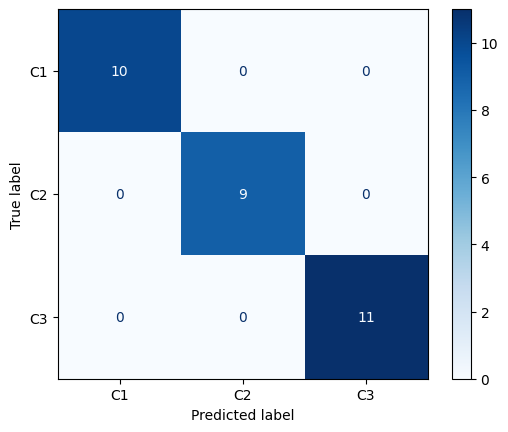

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt

cm= confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["C1","C2","C3"])
display.plot(cmap=plt.cm.Blues)
plt.show()